# Import libraries

In [209]:
import sklearn.metrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,\
    log_loss, precision_recall_curve, RocCurveDisplay, classification_report, confusion_matrix, roc_auc_score

# Import data

In [16]:
data = pd.read_csv('bioresponse.csv')

In [17]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [19]:
data.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## there is no sense to standardize, but it might be a good idea to reduce dimensions

# Point 1 - Train 4 different classifiers using sklearn library to predict "Activity" field from the "bioresponse.csv" dataset:
### - small decision tree;
### - deep decision tree;
### - random forest on small trees;
### - random forest on deep trees;

In [20]:
x = data.loc[:, data.columns !='Activity'] # our data and features
y = data['Activity'] # our target/classes

In [21]:
# Make train and test sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state = 1)

In [22]:
# Making small/big decision trees and random forests

dt_small = DecisionTreeClassifier(max_depth = 4, random_state = 1)
dt_small.fit(train_x, train_y)

dt_big = DecisionTreeClassifier(max_depth = 25, random_state = 1)
dt_big.fit(train_x, train_y)

rf_small = RandomForestClassifier(max_depth = 4, random_state = 1)
rf_small.fit(train_x, train_y)

rf_big = RandomForestClassifier(max_depth = 25, random_state = 1)
rf_big.fit(train_x, train_y)

classifiers = [dt_small, dt_big, rf_small, rf_big]

# Calculate the following metrics to check the quality of your models:
### - precision;
### - recall;
### - accuracy;
### - F1-score;
### - log-loss;

In [71]:
#Calculate certain metrics
metrics_list = [precision_score, recall_score, accuracy_score, f1_score, log_loss]
result_list = []
proba = []

for classifier in classifiers:
    predictions = classifier.predict(test_x)
    proba.append(classifier.predict_proba(test_x))
    l = []
    for metric in metrics_list:
        l.append(metric(test_y, predictions))
    result_list.append(l)

# result_list

In [40]:
df_results= pd.DataFrame(data=np.array(result_list),
                       index=['small decision tree', 'deep decision tree',
                              'random forest on small trees', 'random forest on deep trees'],
                       columns=['precision' , "recall", "accuracy", "F1-score", "log-loss"])
df_results

,precision,recall,accuracy,F1-score,log-loss
small decision tree,0.769091,0.821359,0.766525,0.794366,8.415309
deep decision tree,0.741379,0.751456,0.719616,0.746384,10.106056
random forest on small trees,0.761811,0.751456,0.734542,0.756598,9.568091
random forest on deep trees,0.843177,0.803883,0.810235,0.823062,6.839840


### The obtained results show us several metrics. The most accurate method is deep random forest with max_depth = 25. That classifier is a leader in each metric except recall. Small decision tree has the biggest recall score, but the difference between deep random forest is not significant.

# Plot precision-recall and ROC curves for your models.

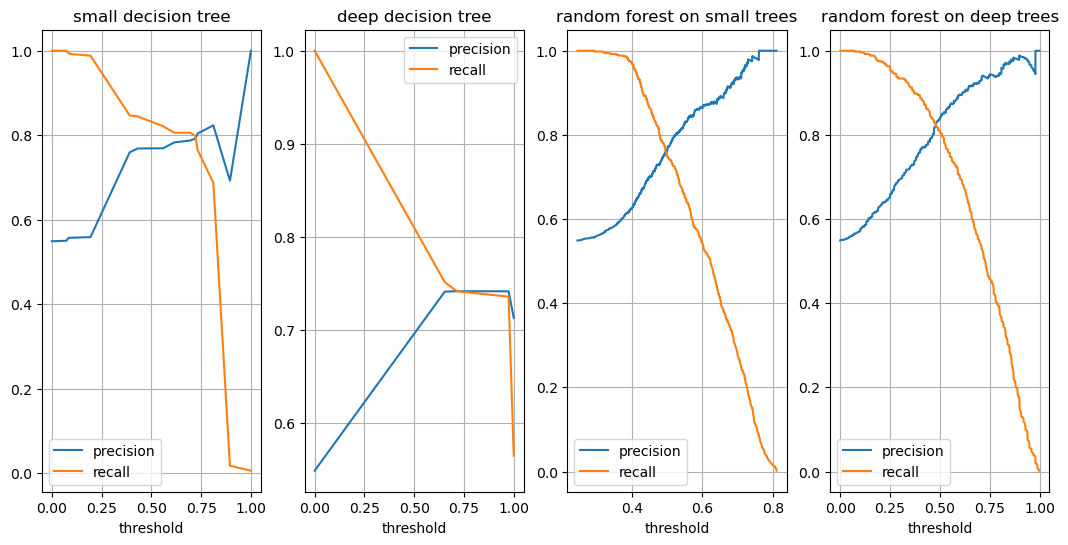

In [141]:
#Ploting Precision-Recall Curve
precs = []
recs = []
threshs = []
labels = ['small decision tree', 'deep decision tree',
                              'random forest on small trees', 'random forest on deep trees']

for i in range(len(proba)):
    prec, rec, thresh = precision_recall_curve(test_y, proba[i][:,1])
    precs.append(prec)
    recs.append(rec)
    threshs.append(thresh)
plt.figure(figsize=(13, 6))
for i in range(len(labels)):
    ax = plt.subplot(1, len(labels), i+1)
    plt.plot(threshs[i], precs[i][:-1], label="precision")
    plt.plot(threshs[i], recs[i][:-1], label="recall")
    plt.xlabel("threshold")
    ax.set_title(labels[i])
    plt.legend()
    plt.grid()

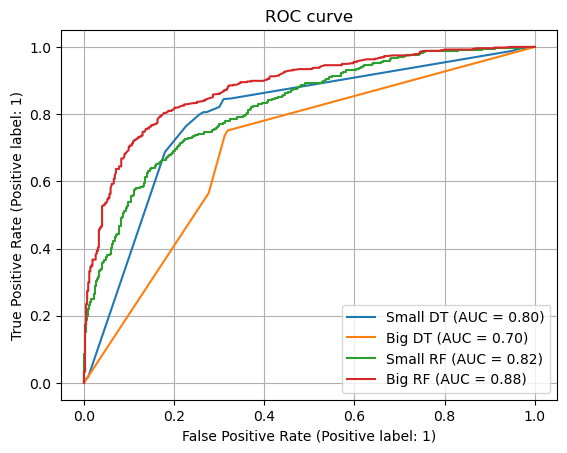

In [204]:
#Ploting ROC Curve
fig, ax = plt.subplots()

models = [
    ("Small DT", dt_small),
    ("Big DT", dt_big),
    ("Small RF", rf_small),
    ("Big RF", rf_big)
]

model_displays = {}
for name, pipeline in models:
    model_displays[name] = RocCurveDisplay.from_estimator(
        pipeline, test_x, test_y, ax=ax, name=name
    )
_ = ax.set_title("ROC curve")
plt.grid()

### Looking at the ROC curves we can see, that the largest area under the curve is for deep Random Forest Classifier.

# Train a classifier who avoids Type II (False Negative) errors and calculate metrics from p.2 for it. Recall for it should be not less than 0.95.

In [196]:
RF = RandomForestClassifier(n_estimators=100, criterion='entropy',
                            max_depth=20, min_samples_split=7, random_state=1)
RF.fit(train_x, train_y)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=7,
                       random_state=1)

In [201]:
predicted = RF.predict(test_x)
print("Recall:", recall_score(test_y, predicted), '\n')
print(classification_report(test_y, predicted))

Recall: 0.8097087378640777 

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       423
           1       0.82      0.81      0.81       515

    accuracy                           0.80       938
   macro avg       0.80      0.80      0.80       938
weighted avg       0.80      0.80      0.80       938



In [202]:
# Confusion matrix on train set
conf_mat = confusion_matrix(test_y, predicted)
conf_mat = pd.DataFrame(conf_mat, index=RF.classes_, columns=RF.classes_)
conf_mat

,0,1
0,331,92
1,98,417


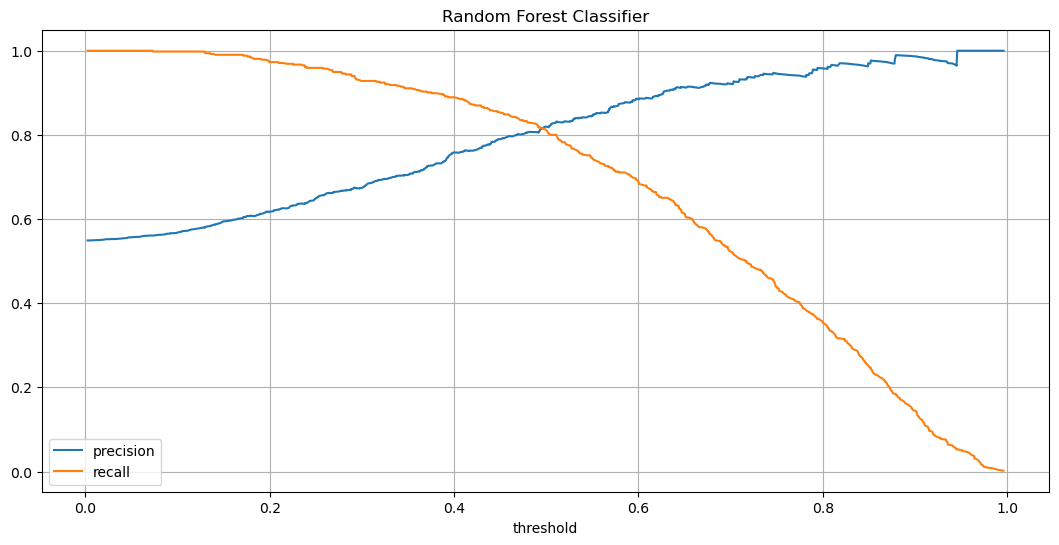

In [191]:
RF_proba = RF.predict_proba(test_x)

precisions, recalls, thresholds = precision_recall_curve(test_y, RF_proba[:,1])

plt.figure(figsize=(13, 6))
plt.plot(thresholds, precisions[:-1], label="precision")
plt.plot(thresholds, recalls[:-1], label="recall")
plt.xlabel("threshold")
plt.title('Random Forest Classifier')
plt.legend()
plt.grid()

### As we can see our classification model recall is 0.81 that is not enough for the task. In the plotted curve we can see, that recall bigger 0.95 where treshold is under 0.3

In [206]:
pred_test_treshold = RF.predict_proba(test_x)
pred_test_treshold = (pred_test_treshold[:,1] >= 0.25).astype(int)

print(classification_report(test_y, pred_test_treshold))

              precision    recall  f1-score   support

           0       0.88      0.37      0.52       423
           1       0.65      0.96      0.77       515

    accuracy                           0.69       938
   macro avg       0.77      0.66      0.65       938
weighted avg       0.75      0.69      0.66       938



In [211]:
# Metrics
print("Precision:", round(precision_score(test_y, pred_test_treshold), 2))
print("Recall:", round(recall_score(test_y, pred_test_treshold), 2))
print("Accuracy:", round(accuracy_score(test_y, pred_test_treshold), 2))
print("F1 Score:", round(f1_score(test_y, pred_test_treshold), 2))
print("Log-Loss:", round(log_loss(test_y, pred_test_treshold), 2))

Precision: 0.65
Recall: 0.96
Accuracy: 0.69
F1 Score: 0.77
Log-Loss: 11.07


# Conslusion

## The dependence of precision and recall scores was researched in this laboratory work. The obtained recall upper 0.95 was got by setting treshold value equal 0.25, however the precision score was downgraded. Other required metrics were calculated.